# 5.1 奇异值分解与主成分分析

## 一、 奇异值分解

奇异值分解(Singular Value Decomposition, SVD)是一个矩阵分析的理论算法，但它的应用已经渗入到不同领域中。SVD的过程不是很好理解，因为它不够直观，但它对矩阵分解的效果却非常好。比如，Netflix（一个提供在线电影租赁的公司）曾经就悬赏100万美金，如果谁能提高它的电影推荐系统评分预测准确率提高$10\%$的话。令人惊讶的是，这个目标充满了挑战，来自世界各地的团队运用了各种不同的技术。最终的获胜队伍"BellKor's Pragmatic Chaos"采用的核心算法就是基于SVD。 和其他数学概念一样，从几何的角度来理解是对人类友好的方式之一。在进一步之前，让我们先介绍仿射变换。

#### 仿射变换的几何意义

Case 1：先考虑以 $2\times 2$ 的线性变换矩阵为例，首先来看一个较为特殊的对角矩阵：

$$
	M_1 = \left[ \begin{array}{cc}
		3 & 0\\
		0 & 1
	\end{array}
	\right]
$$

从几何上讲，$M_1$ 是将二维平面上的点 $(x,y)$ 经过线性变换到另外一个点的变换矩阵，%如下所示
$$
	M_1\left[ \begin{array}{c}
		x\\
		y
	\end{array}
	\right] = \left[ \begin{array}{cc}
		3 & 0\\
		0 & 1
	\end{array}
	\right] \left[ \begin{array}{c}
		x\\
		y
	\end{array}
	\right] = \left[ \begin{array}{c}
		3x\\
		y
	\end{array}
	\right]
$$

对角矩阵 $M$ 变换的效果如下图所示, 变换后的平面仅仅是沿 $X$ 水平方面进行了拉伸3倍,  $y$垂直方向是并没有发生变化。

![fig:DiagMTransform](figs/DiagMatrixTransform.jpg)

值得注意的是: 经对角矩阵变换, 相互垂直的网格还是相互垂直的, 只是在某些方向上做了伸缩变换。

Case 2: 对称矩阵
\begin{equation}
		M_2 = \left[ \begin{array}{cc}
		2 & 1\\
		1 & 2
	\end{array}
	\right]. 
	\label{matx:SymmetricMatrix}
\end{equation}

产生的变换效果如图所示：

![SymmetricMapping](figs/MatrixTransform.jpg)

观察发现：$M_2$变换下（由于非对角线上非零元素的存在，发生了旋转），图形沿着$y=x$拉伸了三倍！

Case 3: 先旋转45度，然后再运用变换$M_2$，效果如：

![case3](figs/Turn45Transform.jpg)

跟前面的对角矩阵的功能是相同, 都是将网格沿着一个边的方向拉伸了3倍！

讨论： 

1. 逆时针旋转45度变换矩阵为
$$ M_{rot45} = \frac{\sqrt{2}}{2}\begin{bmatrix}  1 & -1 \\ 1 & 1  \end{bmatrix} $$

2. 由等效关系可知
$$ M_2 \times M_{rot45} = M_{rot45} \times M_1 $$

3. 注意到$M_{rot45}$是一个标准正交矩阵，故可逆，且有
$$ M_2   = M_{rot45} M_1 M^{-1}_{rot45}$$

4. 相似矩阵具有相同的特征值！
  $$  \begin{bmatrix}  2 & 1 \\ 1 & 2 \end{bmatrix}  = \begin{bmatrix}  \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}  \end{bmatrix} \begin{bmatrix}  3 & 0 \\0 & 1 \end{bmatrix}    \begin{bmatrix}   \frac{\sqrt{2}}{2} & - \frac{\sqrt{2}}{2} \\  \frac{\sqrt{2}}{2} &  \frac{\sqrt{2}}{2}  \end{bmatrix}^{-1}$$

In [5]:
k=sqrt(2); [k -k; k k]*[3 0; 0 1]* inv([k -k; k k])  %% 计算验证

ans =

   2   1
   1   2



以上是非奇异矩阵的相似变换，是一般矩阵奇异值分解的特殊情形。

![svd](figs/svd.png)
... 此处省略一千字...  参考 [SVD.pdf](SVD.pdf)  for more details

In [4]:
img = double(rgb2gray(imread('figs/lena.jpg')));

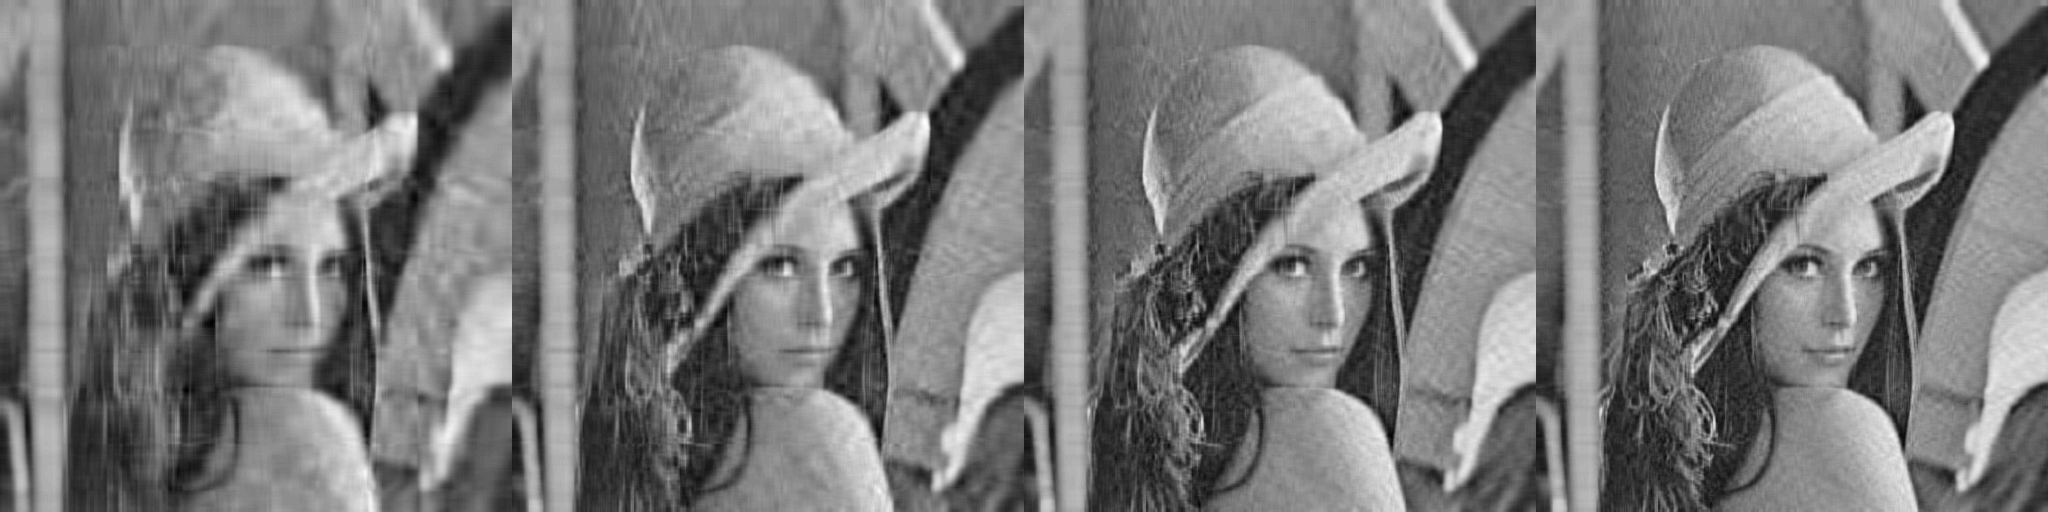

## 二、 主成分分析

设$X_1,X_2,...,X_p$为实际问题所涉及的$p$个随机变量，记$X=(X_1,X_2,...,X_p)^T$，其协方差矩阵为
$$\sum { = \left( {{\delta _{ij}}} \right)}  = E\left[ {\left( {X - E\left( X \right)} \right)\left( {X - E{{\left( X \right)}^T}} \right)} \right].$$
当变量$X$的长度非常大的时候，直接分析上述协方差矩阵（如执行SVD分解算法）将非常耗时。为此人们需要寻找一些计算代价更小的方法。

假设$X$经过线性变换后得到新的综合变量$Y$ ，即
$$ \left\{ \begin{array}{l}
{Y_1} = {l_{11}}{X_1} + {l_{12}}{X_2} + ... + {l_{1p}}{X_p}\\
{Y_2} = {l_{21}}{X_1} + {l_{22}}{X_2} + ... + {l_{2p}}{X_p}\\
...\\
{Y_p} = {l_{p1}}{X_1} + {l_{p2}}{X_2} + ... + {l_{pp}}{X_p}
\end{array} \right.$$

我们记第$i$个向量的形式为

\begin{equation}{Y_i} = {l_{i1}}{X_1} + {l_{i2}}{X_2} + ... + {l_{ip}}{X_p}\end{equation}

其中系数为常数向量。要求满足以下条件：

 1)系数向量是单位向量，即
$${l_i}l_{_i}^T = 1\left( {i = 1,2,...p} \right)$$

 2)$Y_i$ 与$Y_j$ $\left( {i \ne j,i,j = 1,2,...p} \right)$互不相关，即
 $$ {\mathop{\rm cov}} \left( {{Y_i},{Y_j}} \right) = {l_i}\sum {{l_j}}  = 0\left( {i \ne j,i,j = 1,2,...p} \right) $$
 
 3)${Y_1},{Y_2},...{Y_p}$的方差递减,即
 $$ {\mathop{\rm var}} \left( {{Y_1}} \right) \ge {\mathop{\rm var}} \left( {{Y_2}} \right) \ge ... \ge {\mathop{\rm var}} \left( {{Y_p}} \right) \ge 0$$
 于是，称$Y_1$为第一主成分$Y_2$为第二主成分,依此类推,$Y_p$为第$p$个主成分。

当总体$X$的协方差矩阵$\sum { = \left( {{\delta _{ij}}} \right)}$已知时，我们可根据下面的定理求出主成分。

定理：设$X$的协方差矩阵的特征值为${\lambda _1} \ge {\lambda _2} \ge ... \ge {\lambda _p} \ge 0$对应的单位正交特征向量为${e_1},{e_2},...,{e_p}$,则$X$的第$k$个主成分为
$$ {Y_k} = {e_{k1}}{X_1} + {e_{k2}}{X_2} + ... + {e_{kp}}{X_p}\quad\left( {k = 1,2,...p} \right)$$
其中${e_k} = {\left( {{e_{k1}},{e_{k2}},...,{e_{kp}}} \right)^T}$，且
$$ \left\{ \begin{array}{l}
{\mathop{\rm var}} \left( {{Y_k}} \right) = e_k^T\sum {{e_k} = {\lambda _k}} \\
{\mathop{\rm cov}} \left( {{Y_k},{Y_j}} \right) = e_k^T\sum {{e_j} = 0}
\end{array} \right.\quad\begin{array}{l}
\left( {k = 1,2,...p} \right)\\
\left( {k \ne j,k,j = 1,2,...p} \right)
\end{array}$$

推论：若记主成分向量$Y = {\left( {{Y_1},{Y_2},...{Y_P}} \right)^T}$ ，矩阵$P = \left( {{e_1},{e_2},...,{e_p}} \right)$ ,则$Y = {P^T}X$ ，且$Y$ 的协方差
$$ \sum\limits_Y { = {P^T}\sum P }  = diag\left( {{\lambda _1},{\lambda _2},...,{\lambda _p}} \right) $$
主成分的总方差
$$ \sum\limits_{i = 1}^p {{\mathop{\rm var}} \left( {{Y_i}} \right)}  = \sum\limits_{i = 1}^p {{\mathop{\rm var}} \left( {{X_i}} \right)} $$
由于${\mathop{\rm var}} \left( {{Y_k}} \right) = {\lambda _k}\left( {k = 1,2,...,p} \right)$ ，因此${\lambda _k}/\sum\limits_{i = 1}^p {{\lambda _k}}$ 描述了第$k$个主成分提取的信息占总信息的份额。我们称\[{\mathop{\rm var}} \left( {{Y_k}} \right)/\sum\limits_{k = 1}^p {{\mathop{\rm var}} \left( {{Y_k}} \right)}  = {\lambda _k}/\sum\limits_{i = 1}^p {{\lambda _k}} \]
为第$k$个主成分的贡献率

运用协方差矩阵进行主成分分析的命令为pcacov ,其调用格式为:

1)$PC = pca{\mathop{\rm cov}} \left( X \right)$

2)$\left[ {PC,latent,\exp lained} \right] = pca{\mathop{\rm cov}} \left( X \right)$

其中$X$是定理1中的协方差矩阵;输出的涵义为：

PC为矩阵$P = \left( {{e_1},{e_2},...,{e_p}} \right)$ ；

latent 是协方差矩阵$\sum { = \left( {{\delta _{ij}}} \right)}$ 的从大到小排列的特征值向量；

explained 表示贡献率向量即每个主成分的方差在观测量总方差中所占的百分数向量。

In [13]:
pkg load statistics    % load the module before using

In [31]:
normstat   % normpdf  % normcdf

error: Invalid call to normstat.  Correct usage is:

 -- Function File: [MN, V] = normstat (M, S)

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


例1:  设协方差矩阵为$\sum { = \left( {\begin{array}{*{20}{c}}
2&2&{ - 2}\\
2&5&{ - 4}\\
{ - 2}&{ - 4}&5
\end{array}} \right)} $ 求$X$ 的个主成分以及各主成分的贡献率。

In [23]:
S = [2,2,-2; 2,5,-4; -2,-4,5];
[PC,lat,explained] = pcacov(S)

PC =

  -3.3333e-01   2.6268e-16   9.4281e-01
  -6.6667e-01   7.0711e-01  -2.3570e-01
   6.6667e-01   7.0711e-01   2.3570e-01

lat =

   10.00000
    1.00000
    1.00000

explained =

   83.3333
    8.3333
    8.3333



由程序输出结果可知，$X$ 的主成分为：
$$ \left\{ \begin{array}{l}
{Y_1} =  - 0.3333{X_1} - 0.6667{X_2} + 0.6667{X_3}\\
{Y_2} = 0{X_1} + 0.7071{X_2} + 0.7071{X_3}\\
{Y_3} = 0.9428{X_1} - 0.2357{X_2} + 0.2357{X_3}
\end{array} \right.
$$
前两个主成分的累计贡献率为83.3333%+8.3333%= 91.6666%因此，若用前两个主成分代替原来的三个变量，其信息损失为8.3333%，是很小的。

结论：设$Y = {\left( {{Y_1},{Y_2},...{Y_P}} \right)^T}$ 为总体$X = {\left( {{X_1},{X_2},...,{X_p}} \right)^T}$ 的主成分向量，则主成分$Y_i$与$X_j$ 的相关系数
$$ {\rho _{{Y_i}{X_j}}} = \frac{{\sqrt {{\lambda _i}} }}{{\sqrt {{\delta _{jj}}} }}{e_{ij}}$$

例2: 求例1中主成分与原变量的相关系数。

In [14]:
%S = [2,2,-2;2,5,-4;-2,-4,5];
%[PC,vary,explained] = pcacov(S);
S1  = diag(diag(S));
SYX = inv(sqrt(S1))*PC*sqrt(diag(vary))

SYX =

  -7.4536e-01   1.8574e-16   6.6667e-01
  -9.4281e-01   3.1623e-01  -1.0541e-01
   9.4281e-01   3.1623e-01   1.0541e-01



### 案例一：样本主成成分分析

实际问题中，总体$X$ 的协方差矩阵一般是未知的，已知的只是来自于总体的容量为$n$ 的样本观测数据。设取自总体$X$ 的简单随机样本
$$ {x_i} = {\left( {{x_{i1}},{x_{i2}},...,{x_{ip}}} \right)^T}\left( {i = 1,2,...,n} \right)$$

记样本协方差矩阵
$$ S = {\left( {{s_{ij}}} \right)_{p \times p}} = \frac{1}{{n - 1}}\sum\limits_{k = 1}^n {({X_k} - \bar X)} {({X_k} - \bar X)^T}$$
和样本相关矩阵
$$ R = {\left( {{r_{ij}}} \right)_{p \times p}} = \left( {\frac{{{s_{ij}}}}{{\sqrt {{s_{ii}}{s_{jj}}} }}} \right)$$

可分别以$S$和$R$作为总体$\Sigma $和$\rho $的估计，然后按总体主成分分析的方法作样本主成成分分析。在Octave中，运用样本数据矩阵进行主成分分析的命令为princomp，其调用格式为：

1)	PC=princomp(X)

2)	[PC,SCORE,latent]= princomp(X)

其中SCORE是样本主成分的得分。

例3: 对10名男中学生的身高（$X_1$ ），胸围（$X_2$ ），和体重($X_3$ )进行测量，得数据点，对其做主成分分析：

序号	身高 (cm)    胸围 (cm)    体重 (kg)

1	149.5	69.5	38.5

2	162.5	77	55.5

3	162.7	78.5	50.8

4	162.2	87.5	65.5

5	156.5	74.5	49.0

6	156.1	74.5	45.5

7	172.0	76.5	51.0

8	173.2	81.5	59.5

9	159.5	74.5	43.5

10	157.7	79	53.5

In [22]:
X=[149.5 69.5 38.5; ...
   162.5 77   55.5; ...
   162.7 78.5 50.8; ...
   162.2 87.5 65.5; ...
   156.5 74.5 49.0; ...
   156.1 74.5 45.5; ...
   172.0 76.5 51.0; ...
   173.2 81.5 59.5; ...
   159.5 74.5 43.5; ...
   157.7 79   53.5];

[PC,SCORE,latent]= princomp(X)

PC =

   0.559157   0.827674  -0.047960
   0.421287  -0.333483  -0.843390
   0.714046  -0.451382   0.535157

SCORE =

  -18.912380   -1.328249    0.326548
    3.655084   -0.743103    2.475310
    1.042831    1.043702   -1.314606
   15.051307   -9.006792   -1.014324
   -5.394370   -1.941457    1.393026
   -8.117192   -0.692689   -0.460840
    5.543222    9.317756    0.033173
   14.390033    4.806806    0.307507
   -7.644151    3.024165   -1.694220
    0.385615   -4.480139   -0.051574

latent =

   110.0041
    25.3245
     1.5680



所以，样本各主成分贡献率分别为

110.0041/136.896=0.8036

25.3245/136.896=0.1850

1.5680/136.896=0.0115

### 案例二： 典型相关分析

典型相关分析研究的是多个变量与多个变量之间即两组变量之间相关性的问题。它的基本原理是：为了从总体上把握两组变量之间的相关关系，分别在两组变量中提取有代表性的两个综合变量 和 （分别为两个变量组中各变量的线性组合），利用这两个综合变量之间的相关关系来反映两组指标之间的整体相关性。

#### 1. 问题模型

总体典型相关变量:设有两组随机向量$X = {\left( {{X_1},{X_2},...,{X_p}} \right)^T}$，$Y = {\left( {{Y_1},{Y_2},...{Y_q}} \right)^T}\left( {p \le q} \right)$  ，将两组向量合并成一组向量
$$ \left( {{X^T},{Y^T}} \right) = {\left( {{X_1},{X_2},...,{X_p},{Y_1},{Y_2},...{Y_q}} \right)^T}$$ 
其协方差矩阵为
\begin{equation}\sum { = \left( {\begin{array}{*{20}{c}}
{\sum\nolimits_{11} {} }&{\sum\nolimits_{12} {} }\\
{\sum\nolimits_{21} {} }&{\sum\nolimits_{22} {} }
\end{array}} \right)} \end{equation}
其中$$ \sum\nolimits_{11} { = {\mathop{\rm cov}} (X),} \sum\nolimits_{22} { = {\mathop{\rm cov}} (Y),} \sum\nolimits_{12} { = \sum\nolimits_{21}^T {}  = {\mathop{\rm cov}} (X,Y)} $$ 

接下来是要寻找
$$X = {\left( {{X_1},{X_2},...,{X_p}} \right)^T}, Y = {\left( {{Y_1},{Y_2},...{Y_q}} \right)^T}\left( {p \le q} \right)$$
的线性组合
$$\begin{array}{l}
{U_1} = a_1^TX\\
{V_1} = b_1^TY
\end{array}$$
使$U_1$ 和$V_1$ 的相关系数 $\rho \left( {{U_1},{V_1}} \right)$达到最大，这里
$$ \begin{array}{l}
a_1^T = \left( {{a_{11}},{a_{12}},...,{a_{1p}}} \right)\\
b_1^T = \left( {{b_{11}},{b_{12}},...,{b_{1p}}} \right)
\end{array}$$ 

接着，由上式可知
$$ {\mathop{\rm var}} \left( {{U_1}} \right) = a_1^T\sum\nolimits_{11} {{a_1},} {\mathop{\rm var}} \left( {{V_1}} \right) = b_1^T\sum\nolimits_{22} {{b_1},} {\mathop{\rm cov}} \left( {{U_1},{V_1}} \right) = a_1^T\sum\nolimits_{12} {{b_1}} $$
所以$U_1$ 和$V_1$的相关系数为
$$\rho \left( {{U_1},{V_1}} \right) = \frac{{a_1^T\sum\nolimits_{12} {{b_1}} }}{{\sqrt {a_1^T\sum\nolimits_{11} {{a_1}} } \sqrt {b_1^T\sum\nolimits_{22} {{b_1}} } }}$$
满足约束条件$a_1^T\sum\nolimits_{11} {{a_1} = } b_1^T\sum\nolimits_{22} {{b_1} = 1} $的相关系数$\rho \left( {{U_1},{V_1}} \right)$的最大值为第一典型相关系数，$U_1$ 和$V_1$称为第一对相关变量。
如果$U_1$ 和$V_1$还不足以反映$X$ 和$Y$ 之间的相关性，还可构造第二对线性组合：
$$\begin{array}{l}
{U_2} = a_2^TX\\
{V_2} = b_2^TY
\end{array}$$
使得$\left( {{U_1},{V_1}} \right)$ 与 $\left( {{U_2},{V_2}} \right)$不相关。

在约束条件
$${\mathop{\rm var}} \left( {{U_1}} \right) = {\mathop{\rm var}} \left( {{V_1}} \right) = {\mathop{\rm var}} \left( {{U_2}} \right) = {\mathop{\rm var}} \left( {{V_2}} \right) = 1$$
下，求得${a_2}$ 、${b_2}$  使得$\rho \left( {{U_2},{V_2}} \right) = a_2^T\sum\nolimits_{12} {{b_2}} $
取得最大值，此时$\rho \left( {{U_2},{V_2}} \right)$为第二典型相关系数，$U_2$ 和$V_2$称为第二对相关变量。

依此类推，若前$k-1$ 对典型变量还不足以反映$X$ 和$Y$ 之间的相关性，还可构造第$k$ 对线性组合：
$$\begin{array}{l}
{U_k} = a_k^TX\\
{V_k} = b_k^TY
\end{array}$$
在约束条件 ${\mathop{\rm var}} \left( {{U_k}} \right) = {\mathop{\rm var}} \left( {{V_k}} \right) = 1$
$${\mathop{\rm cov}} \left( {{U_k},{U_j}} \right) = {\mathop{\rm cov}} \left( {{U_k},{V_j}} \right) = {\mathop{\rm cov}} \left( {{U_j},{V_k}} \right) = {\mathop{\rm cov}} \left( {{V_k},{V_j}} \right) = 0\left( {1 \le j \prec k} \right)$$
下求得${a_k}$ 、${b_k}$ 使得$\rho \left( {{U_k},{V_k}} \right) = a_k^T\sum\nolimits_{12} {{b_k}}$取得最大值，此时$\rho \left( {{U_k},{V_k}} \right)$ 为第$k$ 典型相关系数，$U_k$ 和$V_k$ 称为第 对相关变量。

#### 2. 计算方法及其实现

In [ ]:
X=[data];                  %输入协方差矩阵X
p=c1;                      % c1表示向量X的维数
q=c2;                      % c2表示向量Y的维数

（1）	计算矩阵${\left[ {{X^T},{Y^T}} \right]^T}$ 的协方差矩阵或相关系数矩阵
$$ \sum { = \left( {\begin{array}{*{20}{c}}
{\sum\nolimits_{11} {} }&{\sum\nolimits_{12} {} }\\
{\sum\nolimits_{21} {} }&{\sum\nolimits_{22} {} }
\end{array}} \right)} , 
R = \left[ {\begin{array}{*{20}{c}}
{{R_{11}}}&{{R_{12}}}\\
{{R_{21}}}&{{R_{22}}}
\end{array}} \right]$$

In [ ]:
R11=X(1:p, 1:p);           %读取$\sum\nolimits_{11} {} $
R12=X(1:p,p+1:p+q);         %读取$\sum\nolimits_{12} {} $
R21=X(p+1:p+q, 1:p);        %读取$\sum\nolimits_{21} {} $
R22=X(p+1:p+q,p+1:p+q);     %读取$\sum\nolimits_{22} {} $

（ 2）令 
$$A = (\Sigma_{11})^{-\frac{1}{2}}\Sigma_{12}(\Sigma_{22})^{-1}\Sigma_{21}(\Sigma_{11})^{-\frac{1}{2}},\qquad B = (\Sigma_{22})^{-\frac{1}{2}}\Sigma_{21}(\Sigma_{11})^{-1}\Sigma_{12}(\Sigma_{22})^{-\frac{1}{2}}$$
求$A,B$ 的特征值$\rho _1^2,\rho _2^2,...,\rho _p^2$ 以及对应的正交单位特征向量 ${e_k},{f_k},k = 1,2,...p$

In [ ]:
[v1,d1]=eig(R11);           %计算特征值与单位正交向量
[v2,d2]=eig(R22);           %计算特征值与单位正交向量
p1=inv(v1*sqrt(d1)*v1');
p2=inv(v2*sqrt(d2)*v2');    %p1,p2表示 $\sum\nolimits_{11} {} $,$\sum\nolimits_{22} {} $  的平方根矩阵的逆
A=p1*R12*inv(R22)*R21*p1;   %计算矩阵A
B=p2*R21*inv(R11)*R12*p2;   %计算矩阵B

In [ ]:
[va,da]=eig(A)
[vb,db]=eig(B)

（3）$X,Y$ 的第$k$ 对典型相关变量为
$$ \begin{array}{l}
U_k = a_k^TX = e_k\Sigma_{11}^{-\frac{1}{2}} X \\
V_k = b_k^TY = f_k^T\Sigma_{22}^{-\frac{1}{2}} Y
\end{array}$$ 

In [ ]:
A1=p1*va                    %计算典型相关变量U的系数
B1=p2*vb                    %计算典型相关变量V的系数

$X,Y$ 的第$k$  对典型相关变量的相关系数为
$$ {\rho _k} = a_k^T \Sigma_{12} b_k , \quad ({k = 1,2,...p}). $$

In [ ]:
r=sqrt(sum(da))             %计算典型相关系数

### 案例三、简单算例

例4:设样本的相关系数矩阵为
$$ R = \left[ {\begin{array}{*{20}{c}}
{{R_{11}}}&{{R_{12}}}\\
{{R_{21}}}&{{R_{22}}}
\end{array}} \right] = \left( {\begin{array}{*{20}{c}}
1&{0.505}&{0.569}&{0.602}\\
{0.505}&1&{0.422}&{0.467}\\
{0.569}&{0.422}&1&{0.926}\\
{0.602}&{0.467}&{0.926}&1
\end{array}} \right) $$
计算典型相关系数与典型相关变量。

解：已知相关系数矩阵 ，且p=2,q=2,计算程序如下：

In [26]:
X=[1,0.505,0.569,0.602;0.505,1,0.422,0.467;0.569,0.422,1,0.926;0.602,0.467,0.926,1];
p=2;
q=2;

In [27]:
R11=X(1:p, 1:p);
R12=X(1:p,p+1:p+q);
R21=X(p+1:p+q, 1:p);
R22=X(p+1:p+q,p+1:p+q);

In [28]:
[v1,d1]=eig(R11);
[v2,d2]=eig(R22);
p1=inv(v1*sqrt(d1)*v1');
p2=inv(v2*sqrt(d2)*v2');
A=p1*R12*inv(R22)*R21*p1;
B=p2*R21*inv(R11)*R12*p2;
[va,da]=eig(A);
[vb,db]=eig(B);

In [29]:
A1=p1*va
B1=p2*vb

A1 =

   0.78079  -0.85597
   0.34451   1.10618

B1 =

  -2.648156  -0.060251
   2.474939  -0.943949



In [30]:
r=sqrt(sum(da))

r =

   0.631085   0.056794



所以典型变量为：
$$
\begin{array}{l}
{U_1} = {\bf{0}}.{\bf{7808}}{X_1} + \;{\bf{0}}.{\bf{3445}}{X_2}\\
{V_1} = {\bf{0}}.{\bf{0603}}{Y_1} + \;{\bf{0}}.{\bf{9439}}{Y_2}\\
{U_2} =  - {\bf{0}}.{\bf{8560}}{X_1} + \;{\bf{1}}.{\bf{1062}}{X_2}\\
{V_2} =  - {\bf{2}}.{\bf{6482}}{Y_1} + \;{\bf{2}}.{\bf{4749}}{Y_2}
\end{array}
$$

### 案例4： 图像的PCA降维分析
（详见人脸分类问题算例）

## 数据文件的读写提示

### 1. csv格式
一种普遍的数据格式是 csv 格式，可以在多种软件(octave, excel, R 等)之间进行数据交换。

In [1]:
dat = csvread('covid-brazil.csv');

In [2]:
size(dat)

ans =

    1   72



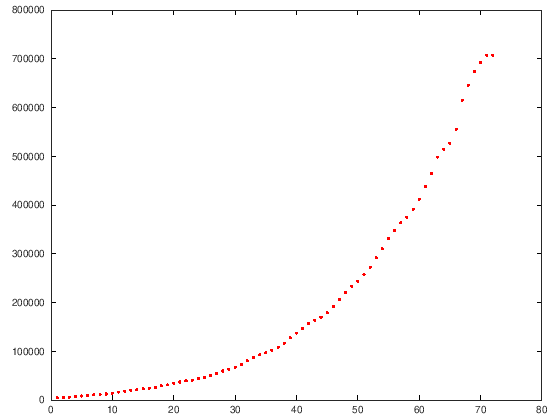

In [4]:
plot(1:72, dat,'r.')

其他如json格式，xml格式以及 xlsx等excel专有格式，需要IO库函数或其他第三方库函数的支持，读者可以根据需要找到相关代码。数据读入octave之后，常常保存为向量(一维数组)或矩阵(二维数组)等形式。

### 2. 图像文件夹

注：在分类问题的人脸识别案例中介绍